In [3]:
import pandas as pd
import pandas_profiling as pd_profiling

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('Desktop/consumo-agua.csv')

In [6]:
dataset

,Geo Point,Geo Shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.240000,631.00,42.066667,3.050000,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,115.13,28.782500,7.320000,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,197.96,32.993333,75.030000,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.000000,253.53,84.510000,84.510000,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.720000,839.35,76.304545,121.570000,3,243.14,57330,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,"19.4485642979,-99.1399395353","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",NaN,2019,Cuauhtémoc,20.053112,3930.41,CUAUHTEMOC,GUERRERO,NaN,4286.28,19.307568,13.687308,1,355.87,233,BAJO
71098,"19.4493393649,-99.1457191092","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",71.30,2019,Cuauhtémoc,21.126615,9549.24,CUAUHTEMOC,GUERRERO,35.650001,9796.12,20.976702,13.506923,1,175.59,238,POPULAR
71099,"19.4483923147,-99.1459300721","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",759.16,2019,Cuauhtémoc,27.527778,4707.25,CUAUHTEMOC,GUERRERO,94.894999,5692.81,29.344381,15.093334,1,226.40,239,BAJO
71100,"19.4475868325,-99.1425094385","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",402.65,2019,Cuauhtémoc,30.605000,550.89,CUAUHTEMOC,GUERRERO,100.662498,963.15,41.876087,9.610000,1,9.61,244,BAJO


In [8]:
dataset.shape

(71102, 17)

In [9]:
dataset.nunique(axis = 0)

Geo Point               22930
Geo Shape               22922
consumo_total_mixto     24339
anio                        1
nomgeo                     17
consumo_prom_dom        52060
consumo_total_dom       47051
alcaldia                   16
colonia                  1340
consumo_prom_mixto      31911
consumo_total           56015
consumo_prom            62214
consumo_prom_no_dom     37440
bimestre                    3
consumo_total_no_dom    27336
gid                     71102
indice_des                  4
dtype: int64

In [12]:
dataset.dtypes

Geo Point                object
Geo Shape                object
consumo_total_mixto     float64
anio                      int64
nomgeo                   object
consumo_prom_dom        float64
consumo_total_dom       float64
alcaldia                 object
colonia                  object
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
bimestre                  int64
consumo_total_no_dom    float64
gid                       int64
indice_des               object
dtype: object

Es necesario ver qué tipo de variables son realmente, no únicamente por cómo le ve Python, si no con fines prácticos

In [10]:
dataset.alcaldia.value_counts()

IZTAPALAPA             10515
GUSTAVO A. MADERO      10058
CUAUHTEMOC              7313
BENITO JUAREZ           6049
VENUSTIANO CARRANZA     5179
MIGUEL HIDALGO          5110
COYOACAN                4947
AZCAPOTZALCO            4216
ALVARO OBREGON          4140
IZTACALCO               3469
TLALPAN                 3204
XOCHIMILCO              2450
TLAHUAC                 1955
MAGDALENA CONTRERAS      955
CUAJIMALPA               892
MILPA ALTA               650
Name: alcaldia, dtype: int64

In [20]:
dataset.nomgeo.value_counts()

Iztapalapa                10515
Gustavo A. Madero         10058
Cuauhtémoc                 7313
Benito Juárez              6049
Venustiano Carranza        5179
Miguel Hidalgo             5110
Coyoacán                   4947
Azcapotzalco               4216
Álvaro Obregón             4140
Iztacalco                  3469
Xochimilco                 2450
Talpan                     2140
Tláhuac                    1955
Tlalpan                    1064
La Magdalena Contreras      955
Cuajimalpa de Morelos       892
Milpa Alta                  650
Name: nomgeo, dtype: int64

In [11]:
dataset.columns.str.lower().str.replace(" ", "_")

Index(['geo_point', 'geo_shape', 'consumo_total_mixto', 'anio', 'nomgeo',
       'consumo_prom_dom', 'consumo_total_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto', 'consumo_total', 'consumo_prom',
       'consumo_prom_no_dom', 'bimestre', 'consumo_total_no_dom', 'gid',
       'indice_des'],
      dtype='object')

In [12]:
def clean_strings(index_obj):
    obj = index_obj.str.lower().str.replace(" ", "_")
    return obj
    

In [13]:
dataset.columns = clean_strings(dataset.columns)

dataset

,geo_point,geo_shape,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.240000,631.00,42.066667,3.050000,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,115.13,28.782500,7.320000,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,197.96,32.993333,75.030000,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.000000,253.53,84.510000,84.510000,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.720000,839.35,76.304545,121.570000,3,243.14,57330,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,"19.4485642979,-99.1399395353","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",NaN,2019,Cuauhtémoc,20.053112,3930.41,CUAUHTEMOC,GUERRERO,NaN,4286.28,19.307568,13.687308,1,355.87,233,BAJO
71098,"19.4493393649,-99.1457191092","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",71.30,2019,Cuauhtémoc,21.126615,9549.24,CUAUHTEMOC,GUERRERO,35.650001,9796.12,20.976702,13.506923,1,175.59,238,POPULAR
71099,"19.4483923147,-99.1459300721","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",759.16,2019,Cuauhtémoc,27.527778,4707.25,CUAUHTEMOC,GUERRERO,94.894999,5692.81,29.344381,15.093334,1,226.40,239,BAJO
71100,"19.4475868325,-99.1425094385","{""type"": ""MultiPolygon"", ""coordinates"": [[[[-9...",402.65,2019,Cuauhtémoc,30.605000,550.89,CUAUHTEMOC,GUERRERO,100.662498,963.15,41.876087,9.610000,1,9.61,244,BAJO


profiling = dataset.profile_report()
profiling

In [14]:
dataset.drop(columns = ["geo_shape"], inplace = True)
dataset.head()

,geo_point,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des
0,"19.4552601937,-99.1126617526",159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.24,631.00,42.066667,3.05,3,3.05,57250,ALTO
1,"19.4552601937,-99.1126617526",0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,115.13,28.782500,7.32,3,7.32,57253,MEDIO
2,"19.4557195871,-99.1135822797",0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.00,197.96,32.993333,75.03,3,75.03,57255,POPULAR
3,"19.4596467168,-99.1044693641",0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.00,253.53,84.510000,84.51,3,253.53,57267,BAJO
4,"19.4741606185,-99.1467497317",56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.72,839.35,76.304545,121.57,3,243.14,57330,BAJO


In [15]:
lat_long = dataset.geo_point.str.split(",", expand = True)

lat_long.columns = ["latitud", "longitud"]

lat_long = lat_long.astype('float64')

lat_long

,latitud,longitud
0,19.455260,-99.112662
1,19.455260,-99.112662
2,19.455720,-99.113582
3,19.459647,-99.104469
4,19.474161,-99.146750
...,...,...
71097,19.448564,-99.139940
71098,19.449339,-99.145719
71099,19.448392,-99.145930
71100,19.447587,-99.142509


In [16]:
data_clean = pd.concat([dataset, lat_long], axis = 1).drop(columns = 'geo_point')
data_clean

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,GUSTAVO A. MADERO,7 DE NOVIEMBRE,53.240000,631.00,42.066667,3.050000,3,3.05,57250,ALTO,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,115.13,28.782500,7.320000,3,7.32,57253,MEDIO,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,GUSTAVO A. MADERO,7 DE NOVIEMBRE,0.000000,197.96,32.993333,75.030000,3,75.03,57255,POPULAR,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,GUSTAVO A. MADERO,NUEVA TENOCHTITLAN,0.000000,253.53,84.510000,84.510000,3,253.53,57267,BAJO,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,AZCAPOTZALCO,PROHOGAR,56.720000,839.35,76.304545,121.570000,3,243.14,57330,BAJO,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,NaN,2019,Cuauhtémoc,20.053112,3930.41,CUAUHTEMOC,GUERRERO,NaN,4286.28,19.307568,13.687308,1,355.87,233,BAJO,19.448564,-99.139940
71098,71.30,2019,Cuauhtémoc,21.126615,9549.24,CUAUHTEMOC,GUERRERO,35.650001,9796.12,20.976702,13.506923,1,175.59,238,POPULAR,19.449339,-99.145719
71099,759.16,2019,Cuauhtémoc,27.527778,4707.25,CUAUHTEMOC,GUERRERO,94.894999,5692.81,29.344381,15.093334,1,226.40,239,BAJO,19.448392,-99.145930
71100,402.65,2019,Cuauhtémoc,30.605000,550.89,CUAUHTEMOC,GUERRERO,100.662498,963.15,41.876087,9.610000,1,9.61,244,BAJO,19.447587,-99.142509


In [17]:
data_clean['alcaldia'] = data_clean.alcaldia.str.lower()
data_clean['colonia'] = data_clean.colonia.str.lower()
data_clean['indice_des'] = data_clean.indice_des.str.lower()


data_clean

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.240000,631.00,42.066667,3.050000,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.000000,115.13,28.782500,7.320000,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.000000,197.96,32.993333,75.030000,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.000000,253.53,84.510000,84.510000,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.720000,839.35,76.304545,121.570000,3,243.14,57330,bajo,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,NaN,2019,Cuauhtémoc,20.053112,3930.41,cuauhtemoc,guerrero,NaN,4286.28,19.307568,13.687308,1,355.87,233,bajo,19.448564,-99.139940
71098,71.30,2019,Cuauhtémoc,21.126615,9549.24,cuauhtemoc,guerrero,35.650001,9796.12,20.976702,13.506923,1,175.59,238,popular,19.449339,-99.145719
71099,759.16,2019,Cuauhtémoc,27.527778,4707.25,cuauhtemoc,guerrero,94.894999,5692.81,29.344381,15.093334,1,226.40,239,bajo,19.448392,-99.145930
71100,402.65,2019,Cuauhtémoc,30.605000,550.89,cuauhtemoc,guerrero,100.662498,963.15,41.876087,9.610000,1,9.61,244,bajo,19.447587,-99.142509


In [18]:
data_clean.dtypes

consumo_total_mixto     float64
anio                      int64
nomgeo                   object
consumo_prom_dom        float64
consumo_total_dom       float64
alcaldia                 object
colonia                  object
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
bimestre                  int64
consumo_total_no_dom    float64
gid                       int64
indice_des               object
latitud                 float64
longitud                float64
dtype: object

profiling2 = data_clean.profile_report()
profiling2

In [19]:
data_clean

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.240000,631.00,42.066667,3.050000,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.000000,115.13,28.782500,7.320000,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.000000,197.96,32.993333,75.030000,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.000000,253.53,84.510000,84.510000,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.720000,839.35,76.304545,121.570000,3,243.14,57330,bajo,19.474161,-99.146750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71097,NaN,2019,Cuauhtémoc,20.053112,3930.41,cuauhtemoc,guerrero,NaN,4286.28,19.307568,13.687308,1,355.87,233,bajo,19.448564,-99.139940
71098,71.30,2019,Cuauhtémoc,21.126615,9549.24,cuauhtemoc,guerrero,35.650001,9796.12,20.976702,13.506923,1,175.59,238,popular,19.449339,-99.145719
71099,759.16,2019,Cuauhtémoc,27.527778,4707.25,cuauhtemoc,guerrero,94.894999,5692.81,29.344381,15.093334,1,226.40,239,bajo,19.448392,-99.145930
71100,402.65,2019,Cuauhtémoc,30.605000,550.89,cuauhtemoc,guerrero,100.662498,963.15,41.876087,9.610000,1,9.61,244,bajo,19.447587,-99.142509


<AxesSubplot:xlabel='longitud', ylabel='latitud'>

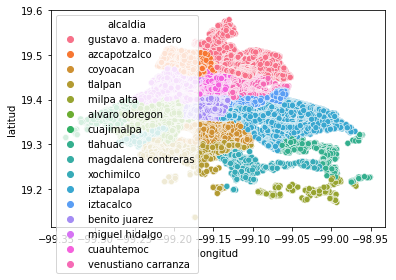

In [21]:
sns.scatterplot(y = "latitud", x = "longitud", hue = "alcaldia", data = data_clean)

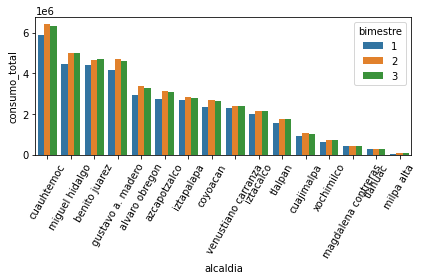

In [42]:
sns.barplot(x = "alcaldia", y = "consumo_total", hue = "bimestre", estimator = sum, data = data_clean, ci = None,
            order = ["cuauhtemoc", "miguel hidalgo", "benito juarez", "gustavo a. madero", "alvaro obregon", "azcapotzalco",
                     "iztapalapa", "coyoacan", "venustiano carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena contreras", "tlahuac", "milpa alta"])
plt.xticks(rotation=60)
plt.tight_layout()


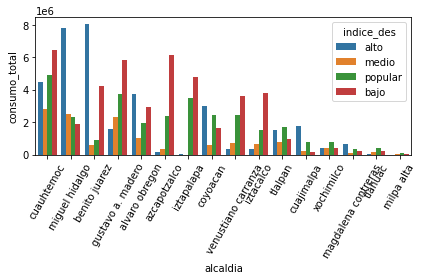

In [47]:
sns.barplot(x = "alcaldia", y = "consumo_total", hue = "indice_des", estimator = sum, data = data_clean, ci = None,
           order = ["cuauhtemoc", "miguel hidalgo", "benito juarez", "gustavo a. madero", "alvaro obregon", "azcapotzalco",
                     "iztapalapa", "coyoacan", "venustiano carranza", "iztacalco", "tlalpan", "cuajimalpa", "xochimilco", "magdalena contreras", "tlahuac", "milpa alta"])
plt.xticks(rotation=60)
plt.tight_layout()

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

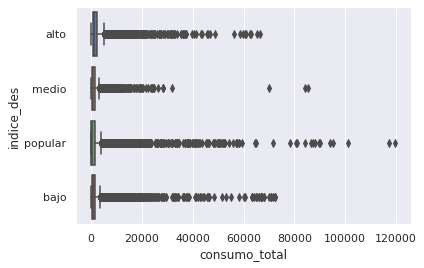

In [51]:
sns.boxplot(x = "consumo_total", y = "indice_des", data = data_clean)

<AxesSubplot:xlabel='consumo_total', ylabel='indice_des'>

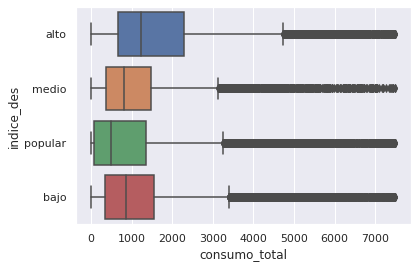

In [53]:
sns.boxplot(x = "consumo_total", y = "indice_des", data = data_clean[data_clean.consumo_total < 7500])

<AxesSubplot:xlabel='consumo_total', ylabel='Count'>

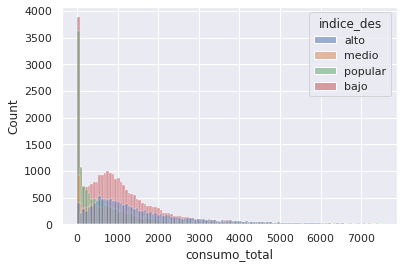

In [57]:
sns.histplot(x = "consumo_total", hue = "indice_des", data = data_clean[data_clean.consumo_total < 7500])